# Importing Libraries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# define models of clustering
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

%matplotlib inline

# Read dataset

In [191]:
df = pd.read_csv("./Supermarket Sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Analyse dataset

## remove not useful 
in this analysis we do not use these 'Rating','Invoice ID'.

In [192]:
df.drop(columns=['Rating','Invoice ID'],inplace=True)
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910


## Plot date and total value
based on the importance of the date and total payment

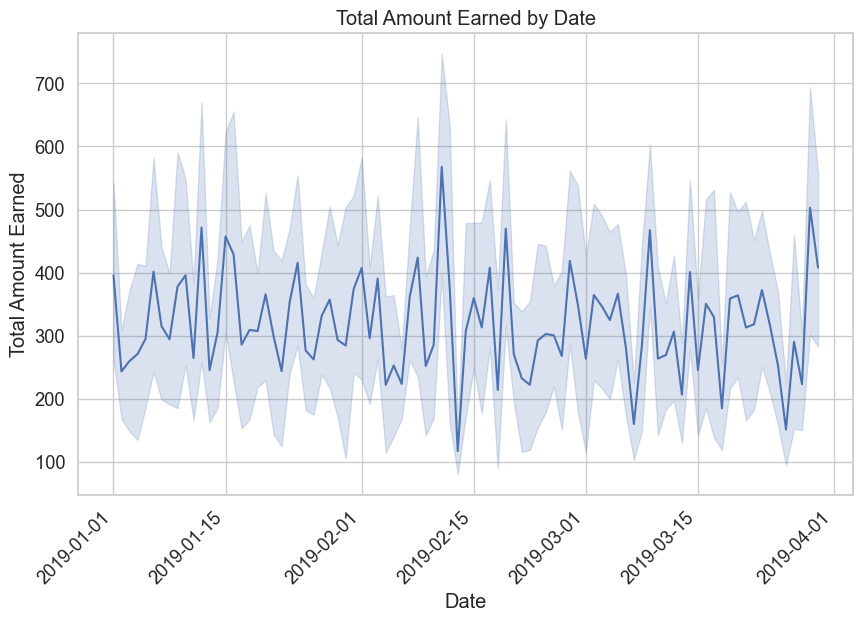

In [193]:
# make a copy of main dataframe
df_day_an = df.copy()
# convert date column of data to date
df_day_an["Date"] = pd.to_datetime(df_day_an["Date"])

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(x="Date", y="Total", data=df_day_an)

# # Set the x-axis labels to show only the date
plt.xticks(rotation=45, ha='right')
# Set the x-axis labels to show all the days
# date_range = pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq='D')
# plt.xticks(date_range, date_range, rotation=45, ha='right')
# Set the plot title and labels
plt.title("Total Amount Earned by Date")
plt.xlabel("Date")
plt.ylabel("Total Amount Earned")

# Display the plot
plt.show()

## Ploting total based on the day of the week

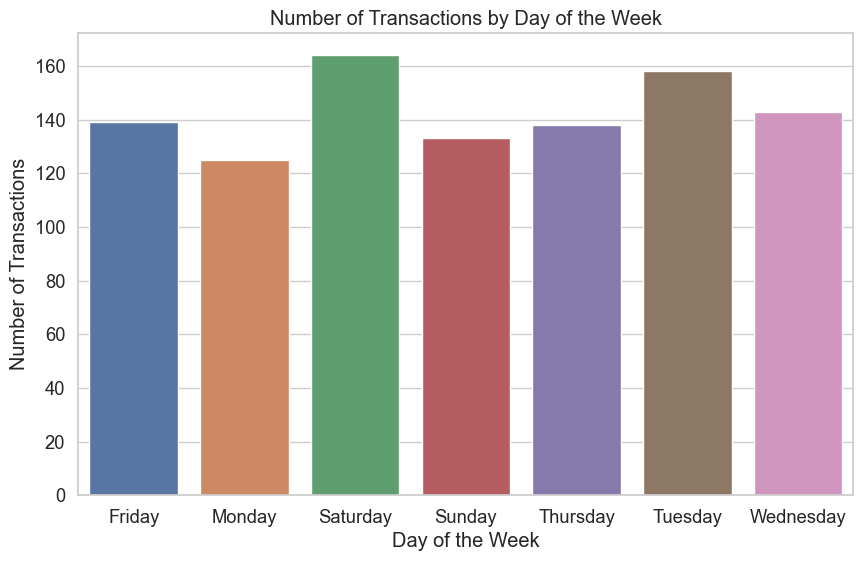

In [194]:
# make a copy of main dataframe
df_week_an = df.copy()

# Extract the day of the week
df_week_an["Date"] = pd.to_datetime(df_week_an["Date"])
df_week_an["DayOfWeek"] = df_week_an["Date"].dt.dayofweek

# Map the day of the week to its name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_week_an["DayOfWeekName"] = df_week_an["DayOfWeek"].map(lambda x: day_names[x])

# Count the transactions per day of the week
transaction_counts = df_week_an["DayOfWeekName"].value_counts().sort_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=transaction_counts.index, y=transaction_counts.values)

# Set the x-axis and y-axis labels
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")

# Set the plot title
plt.title("Number of Transactions by Day of the Week")

# Display the plot
plt.show()


## gross income and unit price of the items bought

<Axes: xlabel='gross income', ylabel='Unit price'>

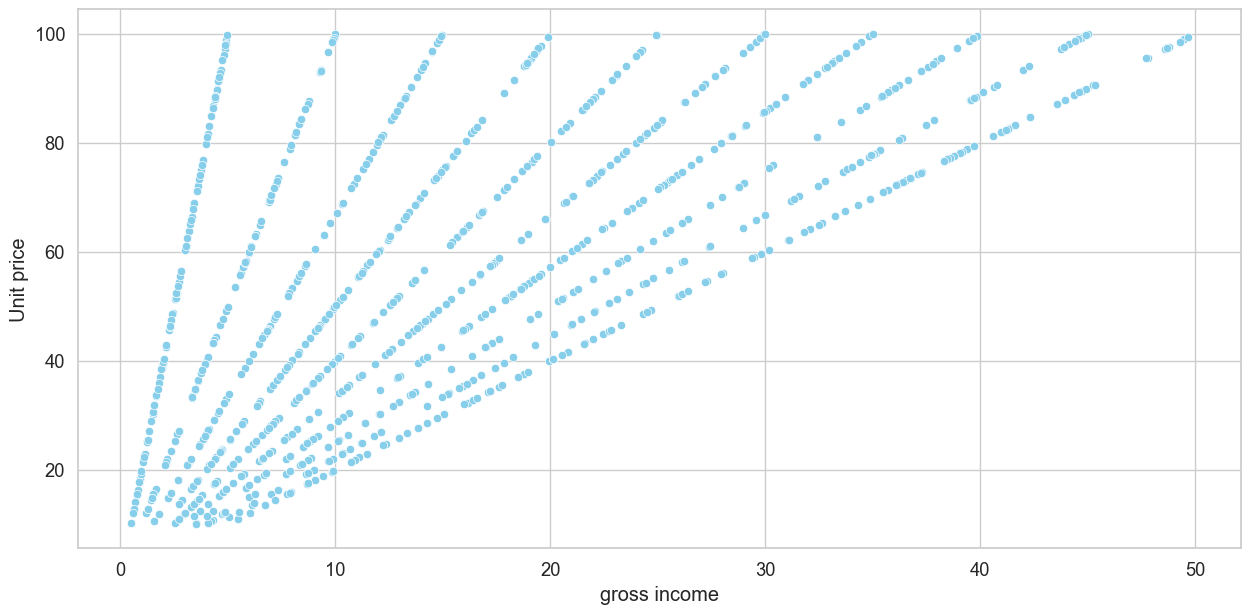

In [195]:
plt.figure(figsize=(15, 7))
sns.set_palette(['skyblue'])
sns.scatterplot(data = df, x = 'gross income', y = 'Unit price')

The heatmap has already shown that there is a correlation of 0.69, which means both are directly related. It is wrong to assume that correlation indicates causation but using common sense it would be arguably evident that the following:

* The cluster of data points, thins in its density around low gross income and high unit price (instances do exist there though).
* The cluster of data points, is heavy in its density around the high gross income and high unit price (density is higher as compared to low gross income).
* People with higher gross incomes seem to be able to afford items of higher unit price.

## Showing the pie chart of the product line

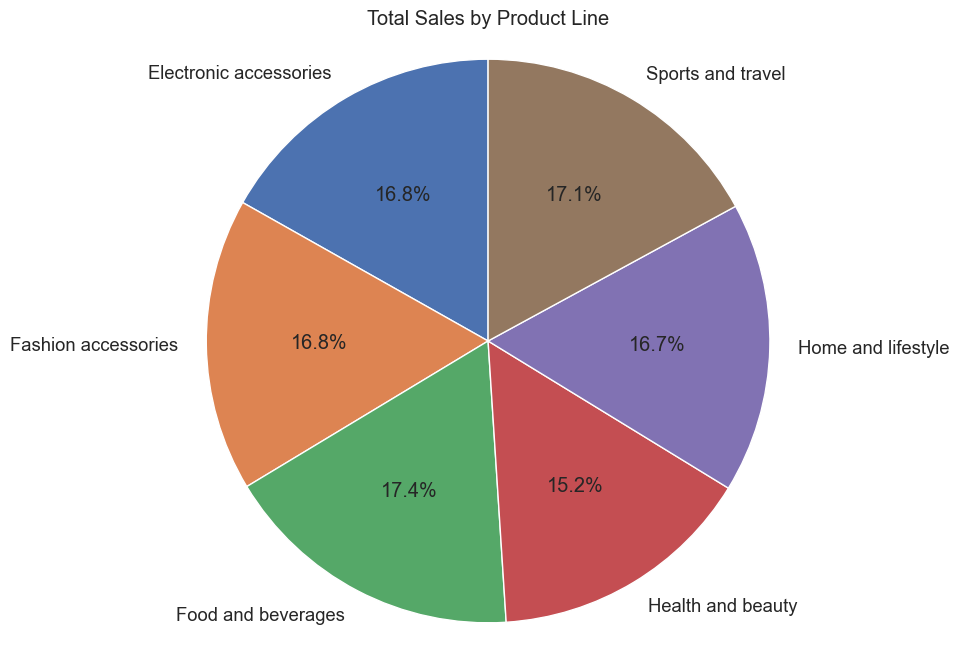

In [196]:
# Calculate the sum of 'Total' values grouped by 'Product line'
Product_line_data = df.groupby('Product line')['Total'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(8, 8))

# Create the pie plot
sns.set_palette("Set3")  # Set color palette
sns.set(font_scale=1.2)  # Set font scale
plt.pie(Product_line_data['Total'], labels=Product_line_data['Product line'], autopct='%1.1f%%', startangle=90)

# Set the plot title
plt.title("Total Sales by Product Line")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

## Analyse the null data

In [197]:
missing_values = df.isnull().sum()
missing_values

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
dtype: int64

## checking the data type

In [198]:
df.dtypes

Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
dtype: object

## Encoding labels
Due to the difference of the data type we use Encoding labels, which we use when there are only two possible values of a categorical features. For example, features having value such as yes or no. Or, maybe, gender feature when there are only two possible values including male or female.

In [199]:
# Enconding categorical variable
le=LabelEncoder()
df_encoded = df.copy()
# le = preprocessing.LabelEncoder()
category_var = list(df.select_dtypes('object').columns)
for varname in category_var:
    df_encoded[varname+'_encode'] = le.fit_transform(df_encoded[varname])
df_encoded = df_encoded.drop(list(df.select_dtypes('object').columns), axis = 1)

In [200]:
df_encoded.dtypes

Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
cogs                       float64
gross margin percentage    float64
gross income               float64
Branch_encode                int64
City_encode                  int64
Customer type_encode         int64
Gender_encode                int64
Product line_encode          int64
Date_encode                  int64
Time_encode                  int64
Payment_encode               int64
dtype: object

## Checking data Correlation

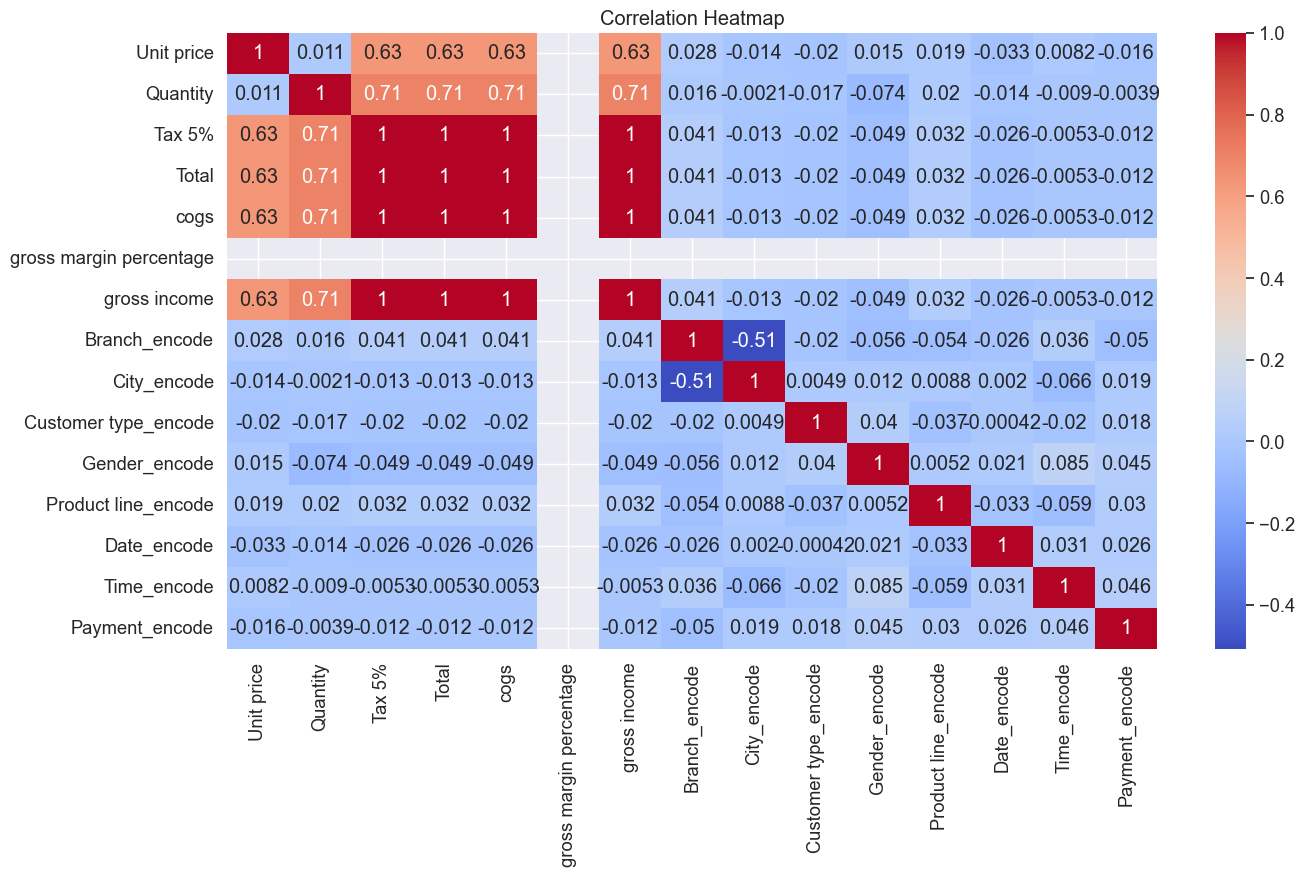

In [201]:
# edit based on the warning
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Create the pair plot
As we have see in the correlation_matrix, we use a threshold by considering 70%, and ploting the high corrolated features

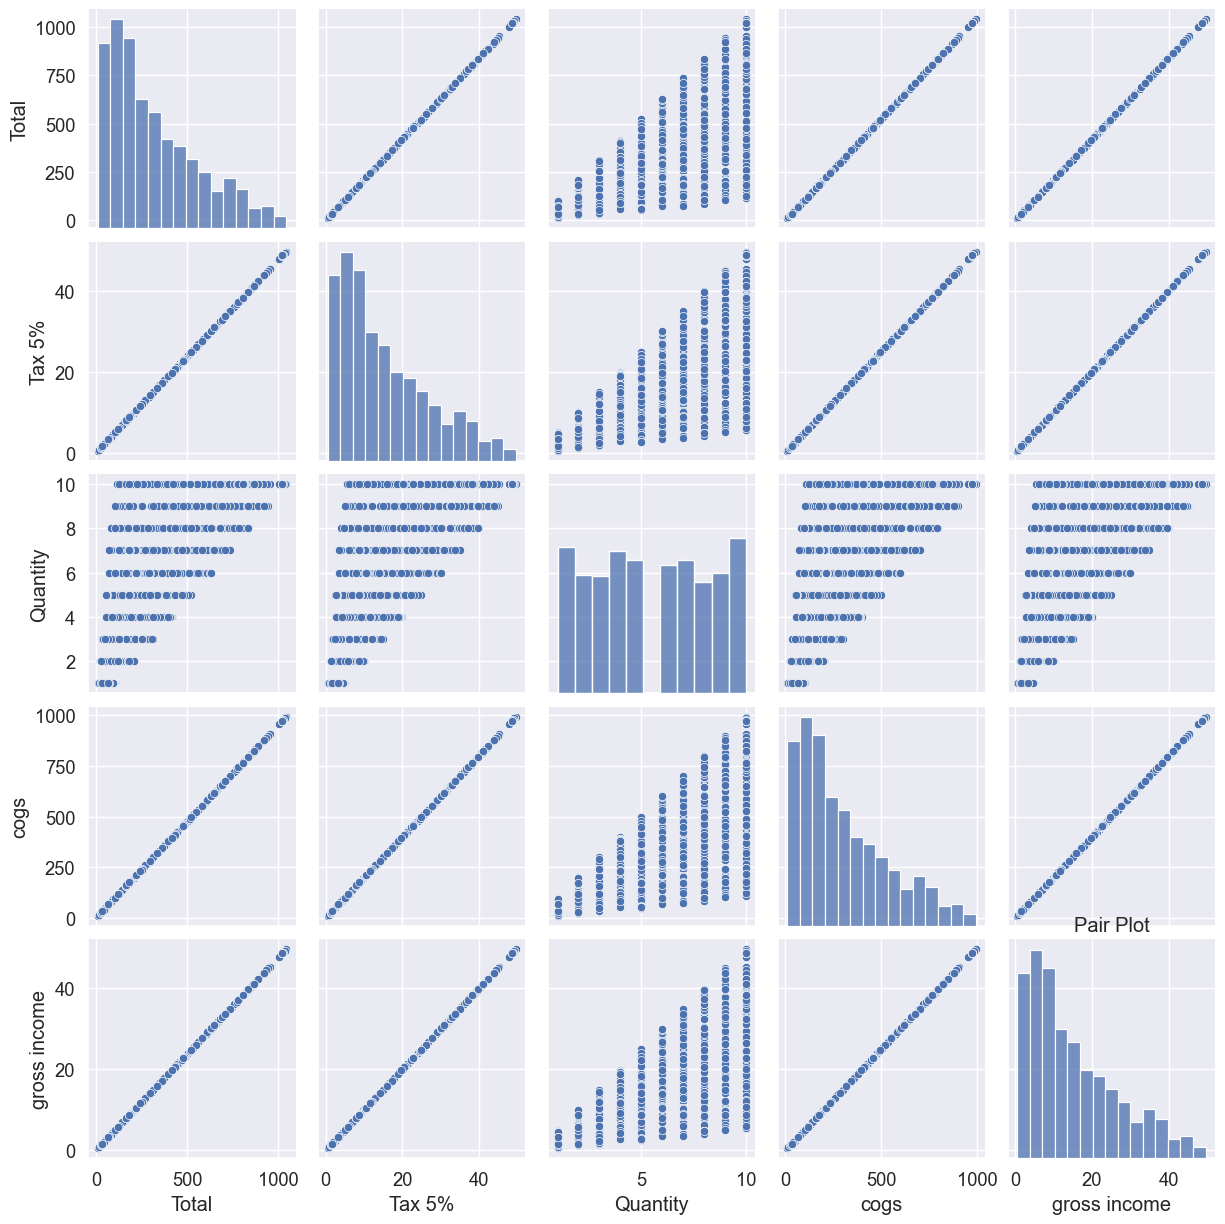

In [202]:
# Convert the correlation matrix to a pandas DataFrame for easier manipulation
correlation_df = pd.DataFrame(correlation_matrix, columns=df_encoded.columns, index=df.columns)

# Find the features with highest correlation (excluding self-correlation and duplicates)
threshold = 0.7  # Adjust the threshold as needed
high_correlation = correlation_df[(correlation_df.abs() > threshold) & (correlation_df != 1.0)].stack().index.tolist()

# Extract the unique features from the high correlation pairs
selected_features = list(set([feature for pair in high_correlation for feature in pair]))

# Create the pair plot using the selected features
sns.pairplot(df_encoded, vars=selected_features)

# Customize the plot (optional)
sns.set_style("whitegrid")
plt.title("Pair Plot")
plt.xlabel("X Label")
plt.ylabel("Y Label")

# Display the plot
plt.show()

---

High correlated features are:

In [203]:
for i in selected_features:
    print(i)

Total
Tax 5%
Quantity
cogs
gross income


---

Removing all highly correlated features from your model is often beneficial, as it can help improve the model's performance and interpretability.

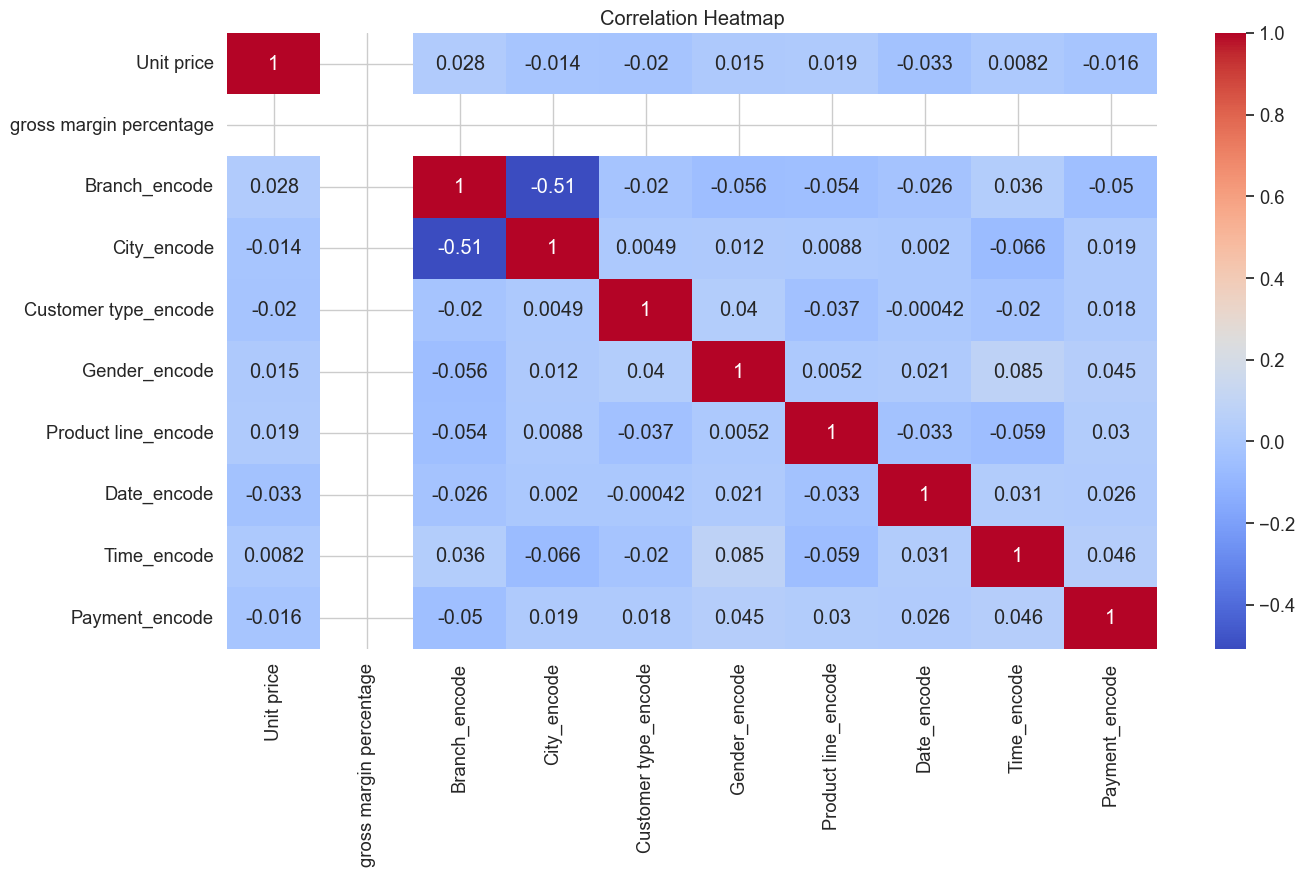

In [204]:
data_filtered_all = df_encoded.drop(columns=selected_features[:])

# showing correlation matrix after removing
correlation_matrix = data_filtered_all.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


---

Removing all the high correlated features except one as representer.

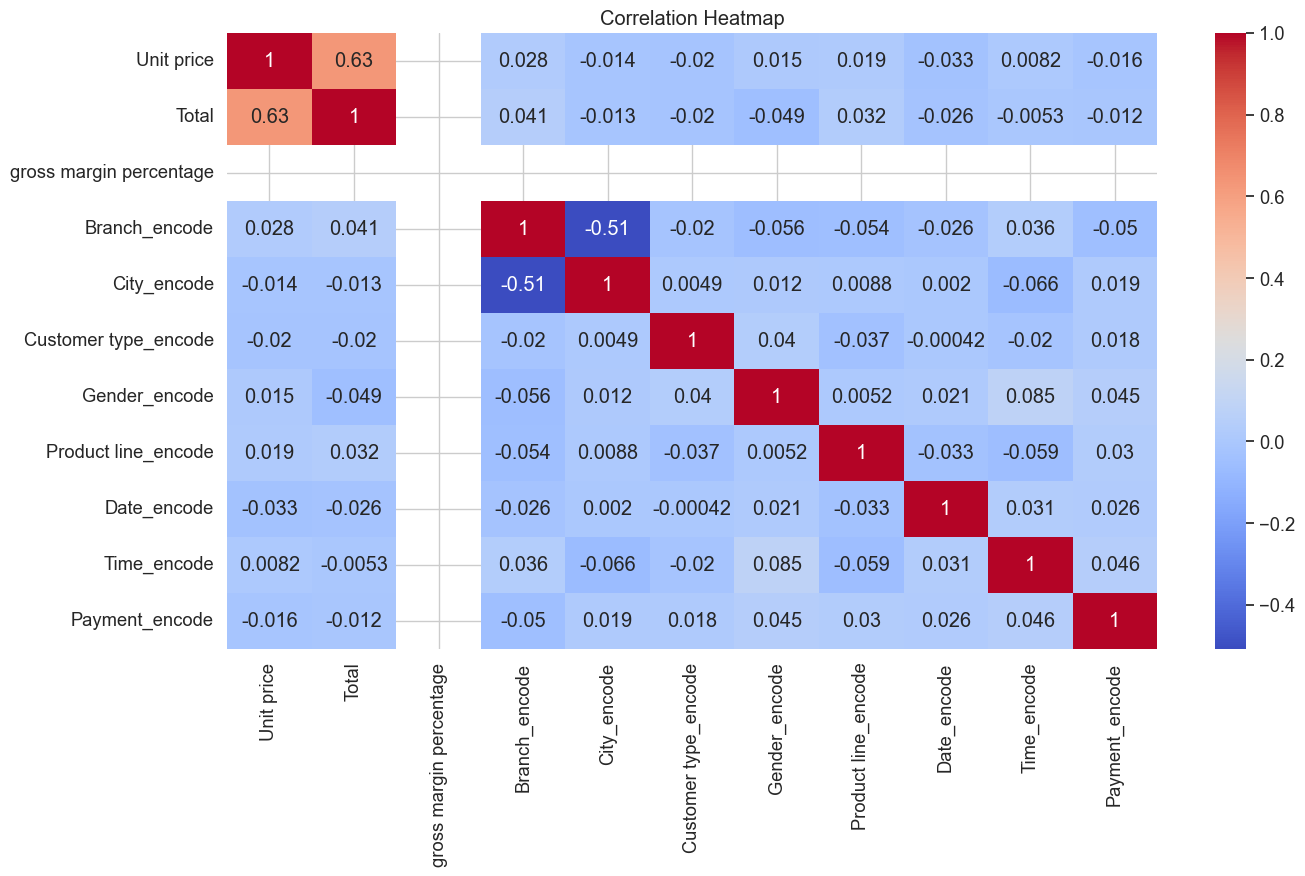

In [205]:
# keep total instead of other high correlated features to keep it for Y
selected_features.remove('Total')
data_filtered_exo = df_encoded.drop(columns=selected_features[:])

# showing correlation matrix after removing
correlation_matrix = data_filtered_exo.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

---

As we can see we have removed the high correlated features, in this case we can test the model to see if this improves model or not.

---

# Define the models

## Regressors

First we would like to define a dictionary for the metrics and also for saving the model

In [206]:
metrics = {
    'Model': [],
    'Dataset': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R-squared': [],
    'Train R-squared': [],
    'Test R-squared': [],
}

models = {
    'RandomForestRegressor': [],
    'XGBRegressor': []
}

for dataset_name, dataset in [('df', df_encoded), ('data_filtered_exo', data_filtered_exo)]:
    
    # Split the data into features (X) and target variable (y)
    X = dataset.drop('Total', axis=1)
    y = dataset['Total']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    # initialize the Random Forest model
    rf = RandomForestRegressor()
    # fit the model to the training data
    rf.fit(X_train, y_train)
    # predict the total sales for the test data
    y_pred_rf = rf.predict(X_test)
    # Calculate R-squared on the training set
    train_r2_rf = rf.score(X_train, y_train)
    # Calculate R-squared on the test set
    test_r2_rf = rf.score(X_test, y_test)

    # '------- XGBRegressor ---------'
    # Create the XGBoost regressor
    xgbregressor = xgb.XGBRegressor()
    # Fit the model on the training data
    xgbregressor.fit(X_train, y_train)
    # Make predictions on the testing data
    y_pred_xgb = xgbregressor.predict(X_test)
    # Evaluate the model using mean squared error
    mse = mean_squared_error(y_test, y_pred_xgb)
    # Calculate R-squared on the training set (XGBRegressor)
    train_r2_xgb = xgbregressor.score(X_train, y_train)
    # Calculate R-squared on the test set (XGBRegressor)
    test_r2_xgb = xgbregressor.score(X_test, y_test)
    
    # ------- Compare two regressors ---------
    # Calculate Mean Squared Error
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    # Calculate Root Mean Squared Error
    rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
    rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
    # Calculate Mean Absolute Error
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    # Calculate R-squared score
    r2_xgb = r2_score(y_test, y_pred_xgb)
    r2_rf = r2_score(y_test, y_pred_rf)

    # saving models:
    models['RandomForestRegressor'].append([dataset_name,rf])
    models['XGBRegressor'].append([dataset_name,xgbregressor])
    
    # Store the metrics in the dataframe
    metrics['Model'].extend(['RandomForestRegressor', 'XGBRegressor'])
    metrics['Dataset'].extend([dataset_name, dataset_name])
    metrics['MSE'].extend([mse_rf, mse_xgb])
    metrics['RMSE'].extend([rmse_rf, rmse_xgb])
    metrics['MAE'].extend([mae_rf, mae_xgb])
    metrics['R-squared'].extend([r2_rf, r2_xgb])
    metrics['Train R-squared'].extend([train_r2_rf, train_r2_xgb])
    metrics['Test R-squared'].extend([test_r2_rf, test_r2_xgb])

# Create the dataframe
df_metrics = pd.DataFrame(metrics)

# Set index on Model and Dataset columns
df_metrics = df_metrics.set_index(['Dataset', 'Model'])
df_metrics


MSE        RMSE         MAE  \
Dataset           Model                                                         
df                RandomForestRegressor      1.466009    1.210788    0.731851   
                  XGBRegressor              14.467147    3.803570    2.519135   
data_filtered_exo RandomForestRegressor  40722.366855  201.797837  151.740982   
                  XGBRegressor           44799.020341  211.657791  157.325316   

                                         R-squared  Train R-squared  \
Dataset           Model                                               
df                RandomForestRegressor   0.999977         0.999995   
                  XGBRegressor            0.999778         0.999999   
data_filtered_exo RandomForestRegressor   0.374070         0.906184   
                  XGBRegressor            0.311409         0.996938   

                                         Test R-squared  
Dataset           Model                                  
df                RandomForestRegressor        0.999977  
                  XGBRegressor                 0.999778  
data_filtered_exo RandomForestRegressor        0.374070  
                  XGBRegressor                 0.311409

---

As shown in the table above we can see that the idea of removing the correlated features did not work well, and if we want to choose between the regressros the one with lower MSE and RMSE also High R squared will be chosed, as we can see both regressors have the same R-squared, but the MSE and RMSE of the RandomForest is lower which shows this regressor has worked well.

---

### Feature importance

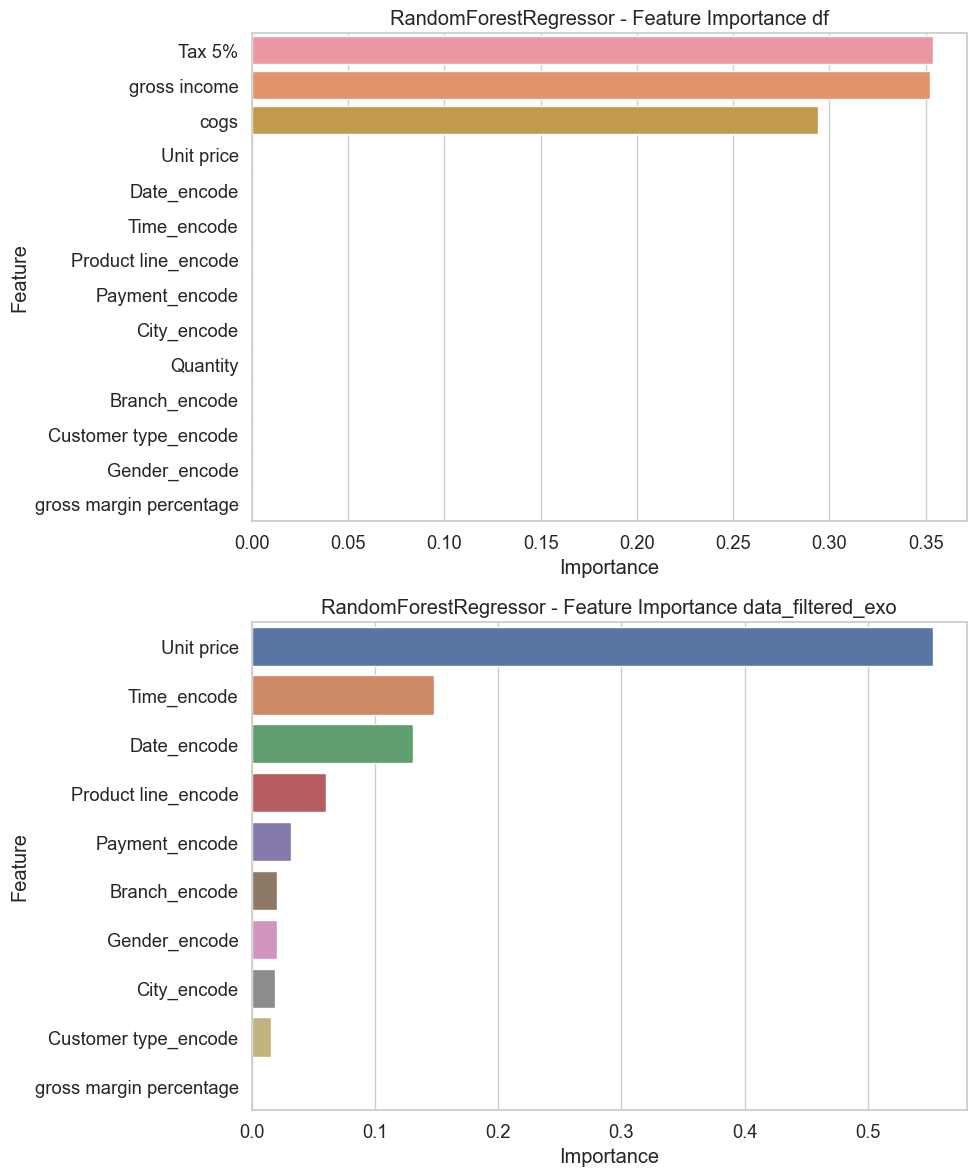

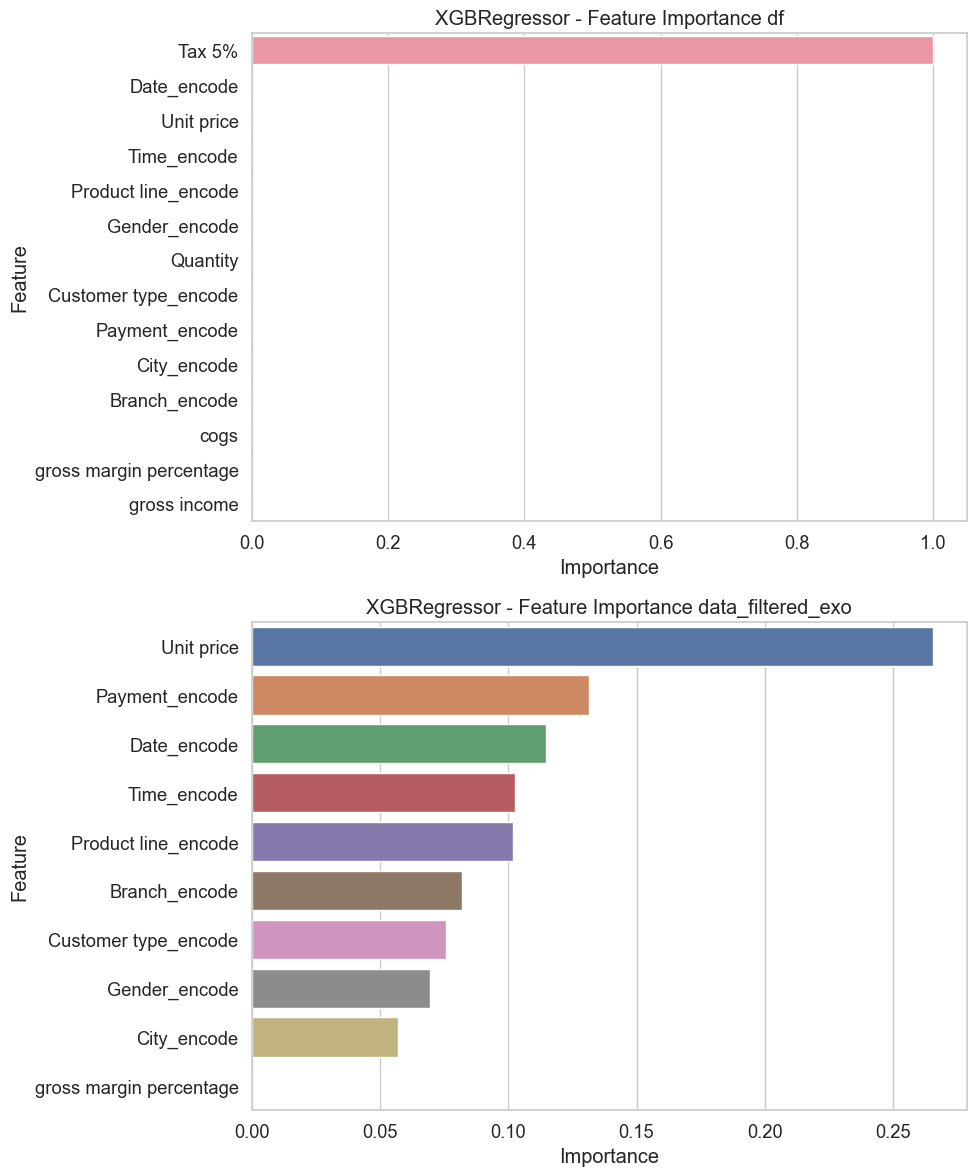

In [207]:
for k,v in models.items():
    # 'df'
    # Print feature importance scores
    importances_df = v[0][1].feature_importances_
    # Create a pandas DataFrame with feature names and importances
    feature_importances_df = pd.DataFrame({'Feature': df_encoded.drop('Total', axis=1).columns, 'Importance': importances_df})
    # Sort the DataFrame by importance values in descending order
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # 'data_filtered_exo'
    # Print feature importance scores
    importances_dfexo = v[1][1].feature_importances_
    # Create a pandas DataFrame with feature names and importances
    feature_importances_dfexo = pd.DataFrame({'Feature': data_filtered_exo.drop('Total', axis=1).columns, 'Importance': importances_dfexo})
    # Sort the DataFrame by importance values in descending order
    feature_importances_dfexo = feature_importances_dfexo.sort_values(by='Importance', ascending=False)

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

    # Plot feature importance for RandomForestRegressor
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df, ax=axes[0])
    axes[0].set_xlabel('Importance')
    axes[0].set_ylabel('Feature')
    axes[0].set_title(f'{k} - Feature Importance df')

    # Plot feature importance for XGBRegressor
    sns.barplot(x='Importance', y='Feature', data=feature_importances_dfexo, ax=axes[1])
    axes[1].set_xlabel('Importance')
    axes[1].set_ylabel('Feature')
    axes[1].set_title(f'{k} - Feature Importance data_filtered_exo')

    # Adjust spacing between subplots
    plt.tight_layout()


---

* As we can see the relevant features are Gross income, cogs and Tax 5%, in the other hand the non relevant features are city, branch and even costumer type.
* we find out if we keep one high correlated feature it would cuse over fitting

---

## Classification models

The other idea for having a better vision about this data is considering Product line as the label for supervised clustering to see insights such as:

* Market Segmentation: Clustering can help identify distinct segments or groups of products based on their characteristics. This can provide insights into the different preferences and needs of customers, allowing for targeted marketing strategies.
* Product Association: Clustering can reveal associations between different product lines. For example, it can identify which product lines are frequently purchased together, providing opportunities for cross-selling or bundling strategies.
* Sales Performance: Clustering can help analyze the sales performance of different product lines. You can identify clusters of product lines that have similar sales patterns or trends, allowing for targeted marketing campaigns or inventory management strategies.
* Customer Behavior: By clustering the product lines, you can analyze customer behavior and preferences. For example, you can identify clusters of customers who prefer specific product categories, enabling personalized marketing efforts.

we will consider some relevant features to have better analysis and finding the relationships of the parameteres

### The Elbow Method
The method evaluates the variance explained by the clusters for different values of K (the number of clusters) and identifies the value of K at which the rate of decrease in variance starts to level off, resembling an elbow shape.

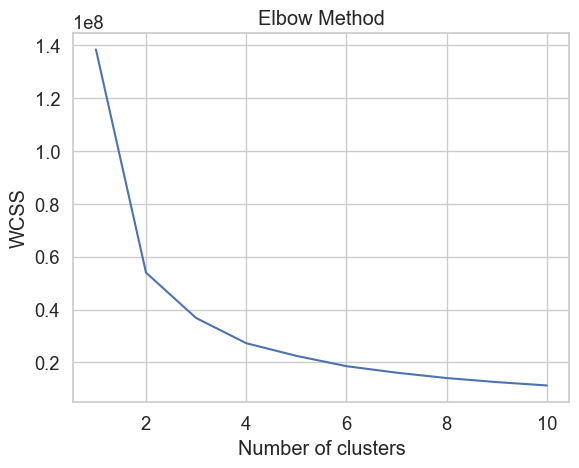

In [208]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


---

We can find out that probable no 3 is the best choce for number of clusters.

---

### K-means

In the context of the K-means clustering algorithm, "k-means++" refers to a method used for initializing the centroids (cluster centers) at the beginning of the algorithm. The initialization of centroids plays a crucial role in the convergence and quality of the clustering results.



In [210]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(df_encoded)
label = kmeans.labels_
df_clustering = pd.concat([df_encoded, pd.DataFrame({'label': list(label)})], axis=1)
df_clustering.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Branch_encode,City_encode,Customer type_encode,Gender_encode,Product line_encode,Date_encode,Time_encode,Payment_encode,label
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,0,2,0,0,3,26,146,2,2
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,2,1,1,0,0,87,23,0,1
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,0,2,1,1,4,81,155,1,2
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,0,2,0,1,3,19,485,2,2
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,0,2,1,1,5,57,29,2,0


In [211]:
cluster = pd.concat([df, pd.DataFrame({'label': list(label)})], axis=1)
cluster.dtypes

Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
label                        int32
dtype: object

---

####  Cluster No.1 :

In [212]:
cluster[label == 0].select_dtypes('object').describe()

,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,169,169,169,169,169,169,169,169
unique,3,3,2,2,6,74,150,3
top,C,Naypyitaw,Member,Female,Electronic accessories,1/15/2019,15:01,Cash
freq,63,63,87,86,31,6,3,59


In [213]:
cluster[label==0]['Product line'].value_counts()

Product line
Electronic accessories    31
Home and lifestyle        30
Sports and travel         29
Fashion accessories       28
Health and beauty         26
Food and beverages        25
Name: count, dtype: int64

In [214]:
cluster[label == 0].select_dtypes('float64').describe()

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,84.089408,36.174314,759.660586,723.486272,4.761905,36.174314
std,11.651196,5.706138,119.828899,114.122761,0.000000,5.706138
min,55.870000,27.935000,586.635000,558.700000,4.761905,27.935000
25%,75.060000,31.311000,657.531000,626.220000,4.761905,31.311000
50%,85.600000,35.420000,743.820000,708.400000,4.761905,35.420000
75%,94.490000,39.712500,833.962500,794.250000,4.761905,39.712500
max,99.960000,49.650000,1042.650000,993.000000,4.761905,49.650000


results:

* 169 from 1,000 supermarket transactions were categorized into cluster 1
* Customers of this group are mostly female (51.4%), and 51.4% of all customers are member of this supermarket.
* The customers mostly bought Electronic accessories, Home and lifestyle and Sports and travel products, respectively,and paid for the product via Cash
* The average supermarket rating provided by this group is 6.6 (with max=10 and min=4).
* This supermarket gains average gross income from customer of this group about 36.07 $

---

####  Cluster No.2 :

In [215]:
cluster[label == 1].select_dtypes('object').describe()

,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,518,518,518,518,518,518,518,518
unique,3,3,2,2,6,89,353,3
top,A,Yangon,Normal,Male,Fashion accessories,1/8/2019,17:38,Ewallet
freq,182,182,267,272,95,11,5,177


In [216]:
cluster[label==1]['Product line'].value_counts()

Product line
Fashion accessories       95
Electronic accessories    94
Food and beverages        90
Home and lifestyle        83
Sports and travel         82
Health and beauty         74
Name: count, dtype: int64

In [217]:
cluster[label == 1].select_dtypes('float64').describe()

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income
count,518.000000,518.000000,518.000000,518.000000,5.180000e+02,518.000000
mean,41.776313,6.303272,132.368716,126.065444,4.761905e+00,6.303272
std,24.384924,3.278917,68.857260,65.578343,8.890370e-16,3.278917
min,10.080000,0.508500,10.678500,10.170000,4.761905e+00,0.508500
25%,21.877500,3.657000,76.797000,73.140000,4.761905e+00,3.657000
50%,35.480000,6.105750,128.220750,122.115000,4.761905e+00,6.105750
75%,57.677500,8.991500,188.821500,179.830000,4.761905e+00,8.991500
max,99.890000,12.697500,266.647500,253.950000,4.761905e+00,12.697500


results:

* 518 from 1,000 supermarket transactions were categorized into cluster 1
* Customers of this group are mostly male (52.4%), and 51.4% of all customers are not member of this supermarket.
* The customers mostly bought fashion accessories, Electronic accessories and Food and beverages products, respectively, and paid for the product via Ewallet
* The average supermarket rating provided by this group is 7.03 (with max=10 and min=4).
This supermarket gains average gross income from customer of this group about 6.29 $

---

#### Cluster No.3 :

In [218]:
cluster[label == 2].select_dtypes('object').describe()

,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,313,313,313,313,313,313,313,313
unique,3,3,2,2,6,87,246,3
top,A,Yangon,Member,Female,Food and beverages,2/25/2019,19:39,Ewallet
freq,108,108,163,169,59,9,4,116


In [219]:
cluster[label==2]['Product line'].value_counts()

Product line
Food and beverages        59
Sports and travel         55
Fashion accessories       55
Health and beauty         52
Home and lifestyle        47
Electronic accessories    45
Name: count, dtype: int64

In [220]:
cluster[label == 2].select_dtypes('float64').describe()

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income
count,313.000000,313.000000,313.000000,313.000000,3.130000e+02,313.000000
mean,63.325527,19.171933,402.610591,383.438658,4.761905e+00,19.171933
std,19.299056,4.265919,89.584307,85.318388,8.896006e-16,4.265919
min,25.900000,12.730500,267.340500,254.610000,4.761905e+00,12.730500
25%,47.970000,15.384000,323.064000,307.680000,4.761905e+00,15.384000
50%,62.130000,18.934000,397.614000,378.680000,4.761905e+00,18.934000
75%,77.500000,22.720500,477.130500,454.410000,4.761905e+00,22.720500
max,99.780000,27.639000,580.419000,552.780000,4.761905e+00,27.639000


results:

* 312 from 1,000 supermarket transactions were categorized into cluster 3
* Customers of this group are mostly female (53.5%), and 51.9% of all customers are member of this supermarket.
* The customers mostly bought Food and beverages, Fashion accessories and Sports and travel products, respectively,and paid for the product via Ewallet
* The average supermarket rating provided by this group is 7.02 (with max=10 and min=4).
This supermarket gains average gross income from customer of this group about 19.09 $